In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.stats import chi2, norm, cauchy
from iminuit import Minuit
from iminuit.cost import LeastSquares
# Cambiare directory per spostarsi nella cartella principale
import os
while not os.getcwd().endswith('Laboratorio_SiPM'):
    os.chdir('..')

import sys
sys.path.append('Config')
from lablib import *

# Definizioni

In [45]:
#definisco le varie funzioni
def gauss(x, mu, sigma, a):
    return a * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

# Vecchi dati

## 53.5 V

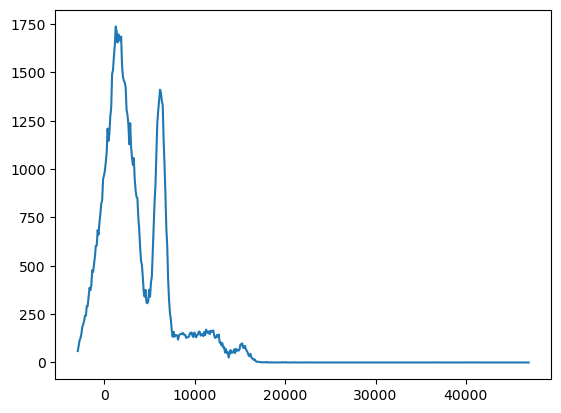

In [46]:
#leggo il file dalla riga 66 in poi, escludendo il testo e il nome delle colonne
df = pd.read_csv('Dati/Parte 2/Riprendere/Spettro CsI/Na_53.5_th-20.txt', delim_whitespace = 'true',  skiprows = 65, encoding='ISO-8859-1', header = None)
df.columns = ['ADC', 'counts'] #ho assegnato il nome alle colonne del dataframe
plt.plot(df['ADC'], df['counts'])

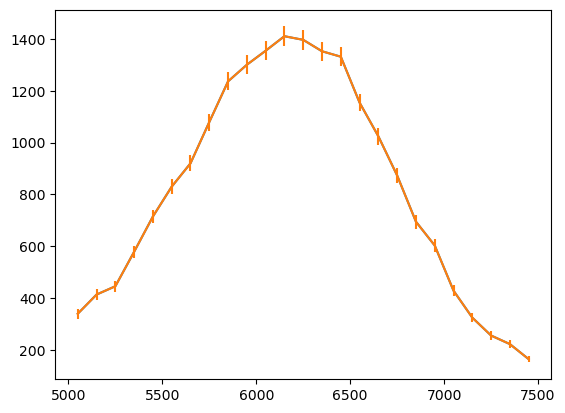

In [47]:
#seleziono dati del primo picco
# Definisco gli indici delle righe copiate
start_index =80  # Indice di inizio (inclusivo)
end_index = 105   # wIndice di fine (esclusivo)
# Copio le righe selezionate in un nuovo dataframe
df_filtrato = df.iloc[start_index:end_index]
x_primo_picco = df_filtrato['ADC']
y_primo_picco = df_filtrato['counts']
plt.plot(x_primo_picco, y_primo_picco)
errori_counts = np.array(np.sqrt(df_filtrato['counts']))
plt.errorbar(x_primo_picco, y_primo_picco, yerr=errori_counts, label='Data')
#print (errori_counts)
errori_counts1 = np.array(np.sqrt(df['counts']))

In [48]:
LS_fit(x_primo_picco, y_primo_picco, errori_counts, gauss, mu = 6153, sigma = 611, a = 1391)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 55.75 (χ²/ndof = 2.5)      │              Nfcn = 68               │
│ EDM = 8.23e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  6.151e3  │  0.005e3  │            │            │         │         │       │
│ 1 │ sigma │    611    │     5     │            │            │         │         │       │
│ 2 │ a     │  1.391e3  │  0.013e3  │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────┐
│       │    mu sigma     a │
├───────┼───────────────────┤
│    mu │  24.3    -5     7 │
│ sigma │    -5  23.1   -41 │
│     a │     7   -41   168 │
└───────┴───────────────────┘

(('mu', 'sigma', 'a'),
 <ValueView mu=6150.891311497364 sigma=611.4389150786035 a=1390.8833697448072>,
 <ErrorView mu=4.9313319121675985 sigma=4.806989513047867 a=12.945063109183046>,
 9.271637888286222e-05,
 22.0,
 55.7544577237836,
 ┌───────┬───────────────────┐
│       │    mu sigma     a │
├───────┼───────────────────┤
│    mu │  24.3    -5     7 │
│ sigma │    -5  23.1   -41 │
│     a │     7   -41   168 │
└───────┴───────────────────┘)

In [49]:
LS_fit(df['ADC'], df['counts'], errori_counts1, gauss,mu = 6157, sigma = 640, a = 1350)



/usr/lib/python3/dist-packages/iminuit/cost.py:129: RuntimeWarning: divide by zero encountered in divide
  z = (y - ym) / ye
/usr/lib/python3/dist-packages/iminuit/cost.py:129: RuntimeWarning: invalid value encountered in divide
  z = (y - ym) / ye


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = nan                        │              Nfcn = 332              │
│ EDM = nan (Goal: 0.0002)         │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │   ABOVE EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  6.157e3  │    nan    │            │            │         │         │       │
│ 1 │ sigma │   6.4e2   │    nan    │            │            │         │         │       │
│ 2 │ a     │  1.35e3   │    nan    │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────┐
│       │    mu sigma     a │
├───────┼───────────────────┤
│    mu │   nan   nan   nan │
│ sigma │   nan   nan   nan │
│     a │   nan   nan   nan │
└───────┴───────────────────┘

(('mu', 'sigma', 'a'),
 <ValueView mu=6157.0 sigma=640.0 a=1350.0>,
 <ErrorView mu=nan sigma=nan a=nan>,
 nan,
 497.0,
 nan,
 ┌───────┬───────────────────┐
│       │    mu sigma     a │
├───────┼───────────────────┤
│    mu │   nan   nan   nan │
│ sigma │   nan   nan   nan │
│     a │   nan   nan   nan │
└───────┴───────────────────┘)

## 54.5 V

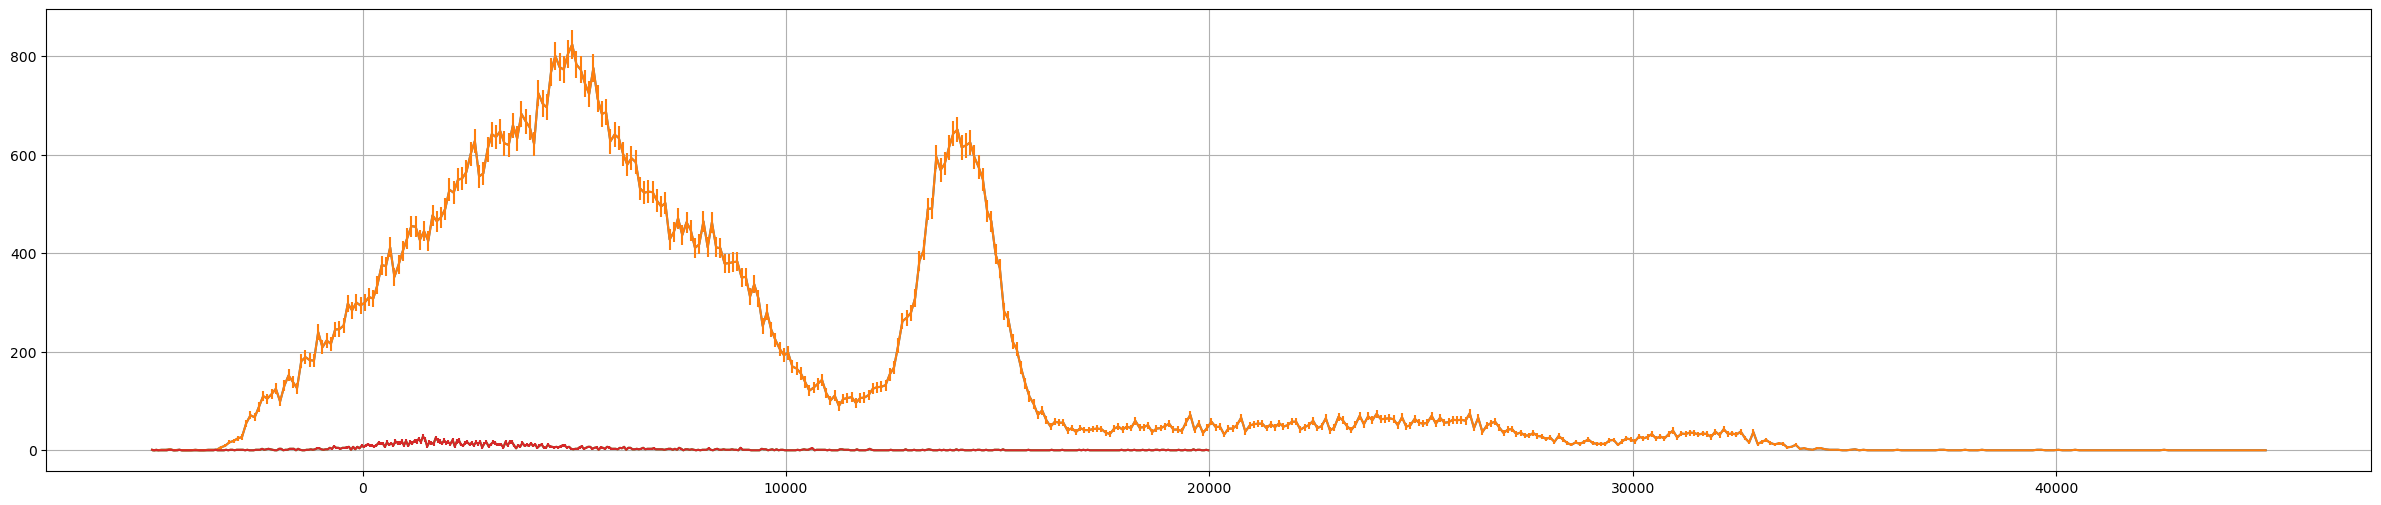

In [50]:
#importo prima il file di dati + fondo, poi quello solo fondo e faccio la sottrazione dei due plot
df54 = pd.read_csv('Dati/Parte 2/Riprendere/Spettro CsI/Na_54.5_th-20.txt', delim_whitespace= 'True', skiprows = 1, encoding='ISO-8859-1', header = None)
df54.columns = ['ADC', 'counts'] #ho assegnato il nome alle colonne del dataframe
err_counts_54 = np.array(np.sqrt(df54['counts']))
df54_bkg = pd.read_csv('Dati/Parte 2/Riprendere/Spettro CsI/Bg_54.5_th-20.txt', delim_whitespace= 'True', skiprows = 65, encoding='ISO-8859-1', header = None)
df54_bkg.columns = ['ADC', 'counts'] #ho assegnato il nome alle colonne del dataframe
err_counts_54_bkg = np.array(np.sqrt(df54_bkg['counts'][:500]))
fig, ax = plt.subplots(figsize = (30,6))
plt.plot(df54['ADC'], df54['counts'])
plt.errorbar(df54['ADC'], df54['counts'], yerr=err_counts_54)
plt.plot(df54_bkg['ADC'][:500], df54_bkg['counts'][:500])
plt.errorbar(df54_bkg['ADC'][:500], df54_bkg['counts'][:500], yerr=err_counts_54_bkg)
plt.grid()


In [51]:
#taglio il vettore per il fit primo picco
start_index = 173
end_index = 210
df_filtrato_54_primo_picco = df54.iloc[start_index:end_index]
err_54_primo_picco = np.array(np.sqrt(df_filtrato_54_primo_picco['counts']))

In [52]:
pars, vals, errs, *others = LS_fit(df_filtrato_54_primo_picco['ADC'], df_filtrato_54_primo_picco['counts'], err_54_primo_picco, gauss, mu = 14000, sigma = 1000, a = 700)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 38.5 (χ²/ndof = 1.1)       │              Nfcn = 77               │
│ EDM = 9.81e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │ 14.054e3  │  0.009e3  │            │            │         │         │       │
│ 1 │ sigma │    916    │     9     │            │            │         │         │       │
│ 2 │ a     │    639    │     7     │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────┐
│       │    mu sigma     a │
├───────┼───────────────────┤
│    mu │  78.5   -10     0 │
│ sigma │   -10  74.1   -40 │
│     a │     0   -40  50.9 │
└───────┴───────────────────┘

In [53]:
for i in range(len(pars)):
    print(f'{pars[i]} = {vals[i]} +/- {errs[i]}')

mu = 14054.41915319895 +/- 8.860649422937424
sigma = 915.8704456736355 +/- 8.611036341461737
a = 639.3797742861282 +/- 7.136411762915896


In [54]:
start_index = 337
end_index = 391
df_filtrato_54_secondo_picco = df54.iloc[start_index:end_index]
err_54_secondo_picco = np.array(np.sqrt(df_filtrato_54_secondo_picco['counts']))

In [55]:
pars, vals, ers, *other = LS_fit(df_filtrato_54_secondo_picco['ADC'], df_filtrato_54_secondo_picco['counts'], err_54_secondo_picco, gauss, mu = 31000, sigma = 1400, a = 10)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 72.71 (χ²/ndof = 1.4)      │              Nfcn = 100              │
│ EDM = 6.84e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  31.29e3  │  0.06e3   │            │            │         │         │       │
│ 1 │ sigma │  1.48e3   │  0.06e3   │            │            │         │         │       │
│ 2 │ a     │   34.1    │    1.3    │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬────────────────────────────┐
│       │       mu    sigma        a │
├───────┼────────────────────────────┤
│    mu │ 3.06e+03   -1.1e3     16.6 │
│ sigma │   -1.1e3 3.12e+03    -49.8 │
│     a │     16.6    -49.8     1.78 │
└───────┴────────────────────────────┘

<ErrorbarContainer object of 3 artists>

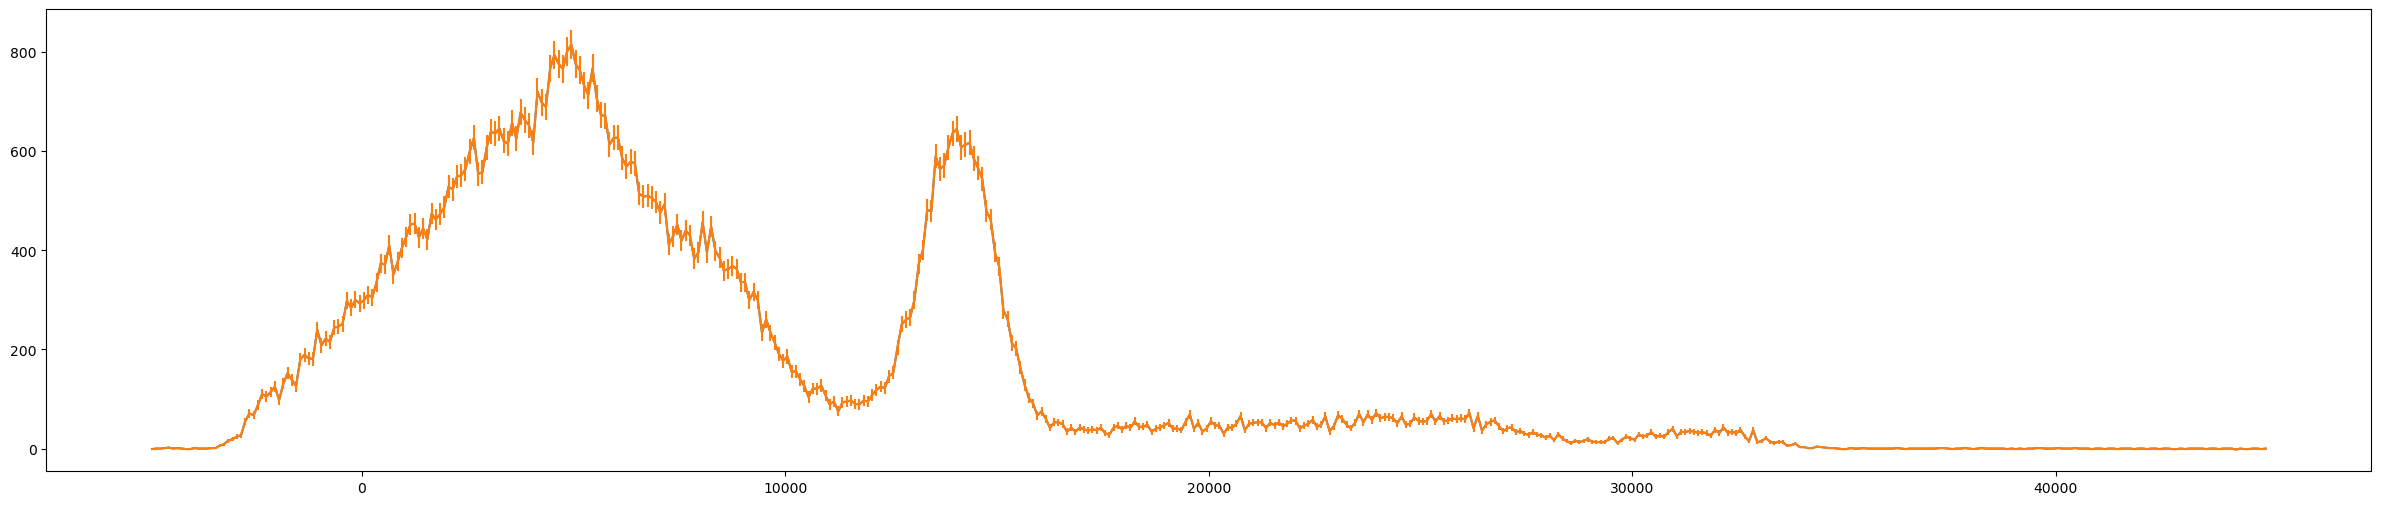

In [56]:
#provo a sottrarre i due daataframe e vedo cosa ne esce
y_54_no_bkg = []
err_y_54 = []
for i in range (500):
    y_54_no_bkg.append( df54['counts'][i] - df54_bkg['counts'][i])
    err_y_54.append(math.sqrt(err_counts_54[i]**2 + err_counts_54_bkg[i]**2))
fig, ax = plt.subplots(figsize = (30,6))
plt.plot(df54['ADC'], y_54_no_bkg)
plt.errorbar(df54['ADC'], y_54_no_bkg, yerr=err_y_54, label='Data')


# Nuovi dati

## Sodio

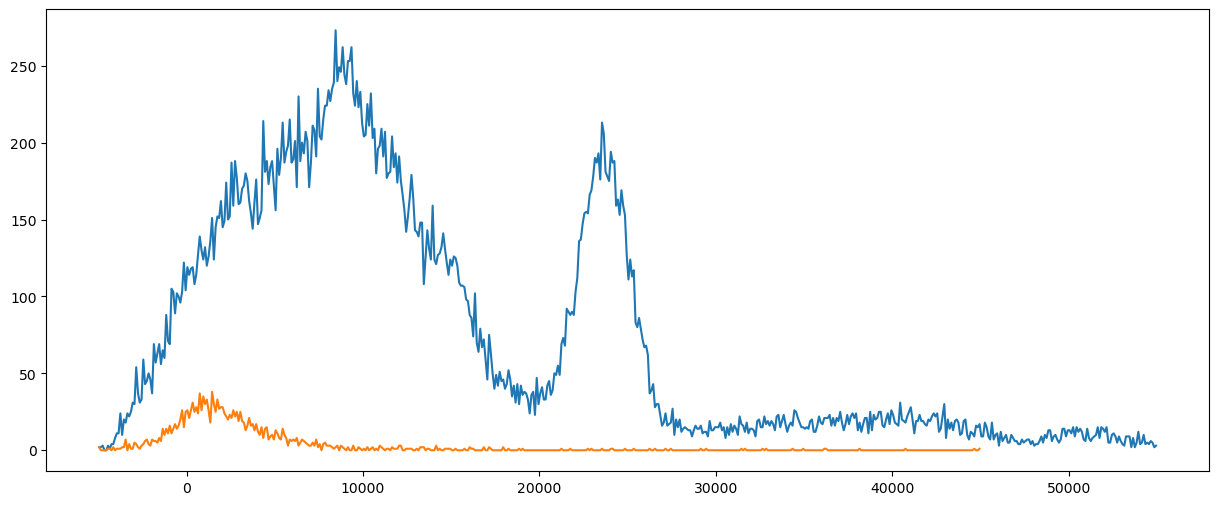

In [69]:
df55 = pd.read_csv('Dati/Parte 2/CsI/Sodio_55.5.txt', delim_whitespace= 'True', skiprows = 65, encoding='ISO-8859-1', header = None)
df55.columns = ['ADC', 'counts'] #ho assegnato il nome alle colonne del dataframe
err_counts_55 = np.array(np.sqrt(df55['counts']))
df55_bkg = pd.read_csv('Dati/Parte 2/CsI/Bkg_54.5V.txt', delim_whitespace= 'True', skiprows = 65, encoding='ISO-8859-1', header = None)   
df55_bkg.columns = ['ADC', 'counts'] #ho assegnato il nome alle colonne del dataframe
err_counts_55_bkg = np.array(np.sqrt(df55_bkg['counts']))
fig, ax = plt.subplots(figsize = (15,6))
plt.plot(df55['ADC'], df55['counts'])
# plt.errorbar(df55['ADC'], df55['counts'], yerr=err_counts_55)
plt.plot(df55_bkg['ADC'], df55_bkg['counts'])
# plt.errorbar(df55_bkg['ADC'], df55_bkg['counts'], yerr=err_counts_55_bkg)

In [70]:
start_index = 250
end_index = 340
df_filtrato = df55.iloc[start_index:end_index]
err_df55_primo_picco = np.array(np.sqrt(df_filtrato['counts']))

In [71]:
pars, vals, errs, *others = LS_fit(df_filtrato['ADC'], df_filtrato['counts'], err_df55_primo_picco, gauss, mu = 14000, sigma = 1000, a = 700)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 211.8 (χ²/ndof = 2.4)      │              Nfcn = 347              │
│ EDM = 1.42e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │ 23.609e3  │  0.021e3  │            │            │         │         │       │
│ 1 │ sigma │  1.693e3  │  0.020e3  │            │            │         │         │       │
│ 2 │ a     │   180.9   │    2.8    │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬──────────────────────┐
│       │     mu  sigma      a │
├───────┼──────────────────────┤
│    mu │    435 -0.1e3      5 │
│ sigma │ -0.1e3    407    -39 │
│     a │      5    -39   8.07 │
└───────┴──────────────────────┘

In [72]:
for i in range(len(pars)):
    print(f'{pars[i]} = {vals[i]} +/- {errs[i]}')

mu = 23608.51324894557 +/- 20.847150959309005
sigma = 1692.7483982730946 +/- 20.17200957548153
a = 180.89247858149204 +/- 2.8413768579202077


In [73]:
risol_na = 2.355 * vals[1] / vals[0]

## Cobalto

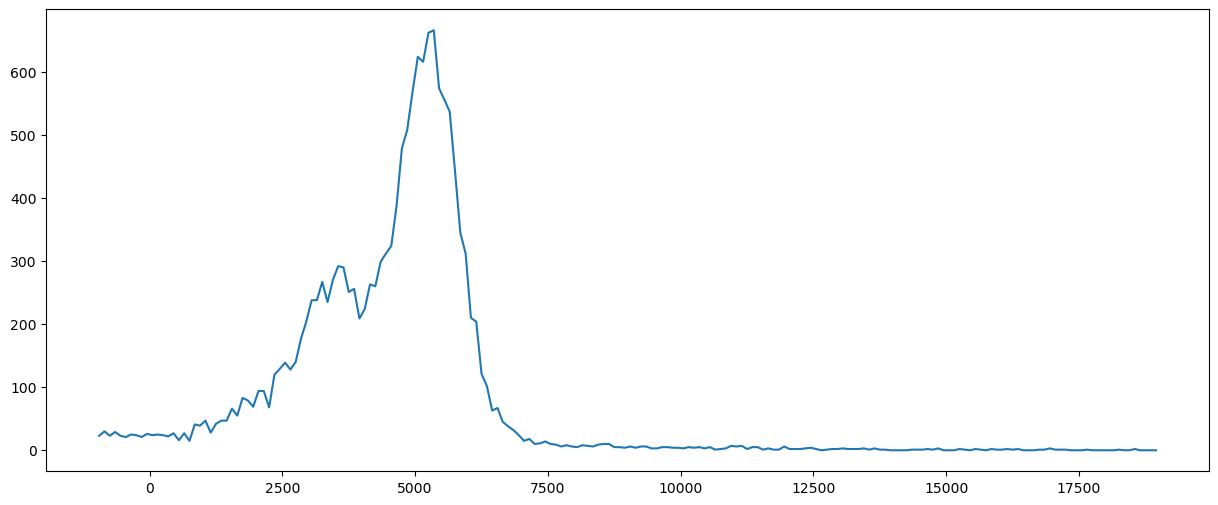

In [74]:
Co = read_corretto(path = 'Dati/Parte 2/CsI/Cobalto_55.5V.txt', titles= ['ADC', 'Counts'])
Co_bkg = read_corretto(path = 'Dati/Parte 2/CsI/Bkg_54.5V.txt', titles= ['ADC', 'Counts'])
Fig, axes = plt.subplots( figsize = (15,6))
axes.plot(Co['ADC'], Co['Counts'])
# axes[0].scatter(Co_bkg['ADC'], Co_bkg['Counts'], color = 'red', s = 0.5)

In [75]:
start_index = 110 - 65
end_index = 160 - 65
pars, vals, errs, *others = LS_fit(Co['ADC'][start_index:end_index], Co['Counts'][start_index:end_index], np.sqrt(Co['Counts'][start_index:end_index]), gauss_pol3, mu = 5000, sigma = 1000, a = 500, b = 0, c = 0, d = 0, cost = 0)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 42.64 (χ²/ndof = 1.0)      │              Nfcn = 636              │
│ EDM = 5.15e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  5.291e3  │  0.008e3  │            │            │         │         │       │
│ 1 │ sigma │    504    │     8     │            │            │         │         │       │
│ 2 │ a     │    553    │     9     │            │            │         │         │       │
│ 3 │ b     │  -0.3127  │  0.0012   │            │            │         │         │       │
│ 4 │ c     │ 29.05e-6  │  0.15e-6  │            │            │         │         │       │
│ 5 │ cost  │  1.058e3  │  0.006e3  │            │            │         │         │       │
│ 6 │ d     │ -0.800e-9 │ 0.015e-9  │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│       │                 mu              sigma                  a                  b                  c               cost                  d │
├───────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│    mu │               67.8                -20                  0          -733.1e-6      -85.035105e-9                 10  5.39607983507e-12 │
│ sigma │                -20               64.4                -30            36.5e-6      130.589116e-9                -20 17.34327605961e-12 │
│     a │                  0                -30               89.6           102.5e-6       49.859198e-9                -10  3.04595152968e-12 │
│     b │          -733.1e-6            36.5e-6           102.5e-6           1.42e-06        -60.299e-12         -5.1772e-3    -4.49085775e-15 │
│     c │      -85.035105e-9      130.589116e-9       49.859198e-9        -60.299e-12            2.3e-14     -183.550903e-9       -1.56125e-18 │
│  cost │                 10                -20                -10         -5.1772e-3     -183.550903e-9               40.2 24.43255105356e-12 │
│     d │  5.39607983507e-12 17.34327605961e-12  3.04595152968e-12    -4.49085775e-15       -1.56125e-18 24.43255105356e-12           2.21e-22 │
└───────┴──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

In [76]:
risol_Co = 2.355 *vals[1]/vals[0]

## Risoluzione

In [82]:
print(f'Risoluzione Cobalto 122 keV: {risol_Co:.3e}','\n',
       f'Risoluzione Sodio 511 keV: {risol_na:.3e}')

Risoluzione Cobalto 122 keV: 2.242e-01 
 Risoluzione Sodio 511 keV: 1.689e-01
